In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import tensorflow as tf

In [2]:
import sys
import tensorflow as tf

print(sys.version)
print(tf.__version__)

3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
1.15.0


# 1. 단순 선형회귀 모델의 비용 구하기

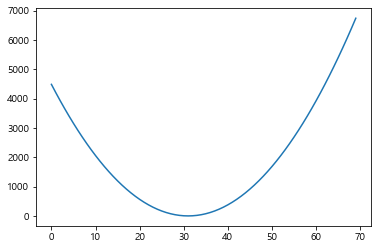

In [71]:
# tf 텐서플로우의 줄임말 

#### 데이터 준비


x_train = [1,2,3]
y_train = [1,2,3]

W = tf.placeholder(tf.float32)

# 정답은 1인걸 이미 알고있긴함...
#### 가설 준비(y = Wx)

hypot = W * x_train


#### 비용함수 (비용을 구하는 공식) w

cost = tf.reduce_mean(tf.square(hypot-y_train)) # y_train 오차값 뺀다

###### --------------------------그래프 완성-----------------------


sess = tf.Session()

tmp =[]
# w값을 -30~50사이에서 찾아볼까..? 1에서 최저점
for i in range(-30,40):
    result = sess.run(cost, feed_dict={W:i})
    tmp.append(result)
    
plt.plot(tmp)

In [ ]:
sess.close()

# 2. 경사 하강 알고리즘을 이용한 가중치 학습

In [73]:
# tf 텐서플로우의 줄임말 

#### 데이터 준비


x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

# 정답은 1인걸 이미 알고있긴함...
#### 가설 준비(y = Wx+b)

hypot = W * x_train +b


#### 비용함수 (비용을 구하는 공식) w

cost = tf.reduce_mean(tf.square(hypot-y_train)) # y_train 오차값 뺀다




# 그래프가 w의 값 비용을 그려보니 볼록한... convex그래프라고함 경사하강법
# 이제 최저비용을 찾는게 목표 30일때....최저임... 찾아보자 ! 2.경사하강 알고리즘으로


gradient = tf.reduce_mean((hypot-y_train) * x_train)
learning_rate = 0.01 # 훈련 횟수도 잘맞아떨어짐 작게잡으면,크게하면 최저비용의 위치를 건너뜀
descent = W - (learning_rate * gradient)
update = W.assign(descent)


###### --------------------------그래프 완성-----------------------###### 


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)


# w, cost => 왼 ,오 w가 높아질수록 cost는 줄어든다.




0 [0.92019653] 0.6606361
1 [0.9362348] 0.60535216
2 [0.95152456] 0.5551075
3 [0.9661008] 0.5094429
4 [0.97999686] 0.46794096
5 [0.9932444] 0.43022218
6 [1.0058738] 0.39594164
7 [1.0179138] 0.3647858
8 [1.0293919] 0.33647004
9 [1.0403343] 0.31073558
10 [1.0507661] 0.28734687
11 [1.0607111] 0.2660903
12 [1.070192] 0.24677122
13 [1.0792304] 0.22921331
14 [1.0878471] 0.21325584
15 [1.0960617] 0.198753
16 [1.1038929] 0.18557204
17 [1.1113586] 0.17359269
18 [1.118476] 0.16270539
19 [1.1252612] 0.15281041
20 [1.1317297] 0.14381757
21 [1.1378964] 0.13564439
22 [1.1437753] 0.12821628
23 [1.1493798] 0.121465236
24 [1.1547228] 0.115329646
25 [1.1598165] 0.10975336
26 [1.1646725] 0.10468533
27 [1.1693019] 0.10007926
28 [1.1737152] 0.095893085
29 [1.1779226] 0.09208844
30 [1.1819336] 0.088630676
31 [1.1857575] 0.08548809
32 [1.1894029] 0.08263195
33 [1.1928782] 0.08003617
34 [1.1961913] 0.07767701
35 [1.1993498] 0.075532936
36 [1.2023609] 0.07358431
37 [1.2052314] 0.07181329
38 [1.207968] 0.0702037

In [74]:
sess.close()

In [77]:
# tf 텐서플로우의 줄임말 

#### 데이터 준비


x_train = tf.placeholder(tf.float32 , shape=[None]) # None 지정해준다 알아서
y_train = tf.placeholder(tf.float32 , shape=[None]) # 판다스에서 -1지정해주면 크기구애x

W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

# 정답은 1인걸 이미 알고있긴함...
#### 가설 준비(y = Wx+b)

hypot = W * x_train +b


#### 비용함수 (비용을 구하는 공식) w

cost = tf.reduce_mean(tf.square(hypot-y_train)) # y_train 오차값 뺀다




# 그래프가 w의 값 비용을 그려보니 볼록한... convex그래프라고함 경사하강법
# 이제 최저비용을 찾는게 목표 30일때....최저임... 찾아보자 ! 2.경사하강 알고리즘으로

gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.01 # 훈련 횟수도 잘맞아떨어짐 작게잡으면,크게하면 최저비용의 위치를 건너뜀
descent = W - (learning_rate * gradient)
update = W.assign(descent)

###### --------------------------그래프 완성-----------------------###### 


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50):
    _, weight, c = sess.run([update, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5, 6, 7], 
                                                          y_train:[1, 2, 3, 4, 5, 6, 7]})
    print(step, weight, c)
    

# w, cost => 왼 ,오 w가 높아질수록 cost는 줄어든다.

0 [0.729935] 1.3698667
1 [0.77151245] 0.88367355
2 [0.8047744] 0.57251006
3 [0.831384] 0.37336534
4 [0.8526717] 0.24591276
5 [0.8697018] 0.16434297
6 [0.88332593] 0.11213852
7 [0.89422524] 0.0787275
8 [0.9029447] 0.05734441
9 [0.9099202] 0.04365928
10 [0.91550064] 0.034900855
11 [0.91996497] 0.029295444
12 [0.9235364] 0.02570799
13 [0.9263936] 0.023412015
14 [0.92867935] 0.02194257
15 [0.93050796] 0.02100217
16 [0.93197083] 0.02040029
17 [0.9331411] 0.020015063
18 [0.9340774] 0.019768555
19 [0.9348264] 0.019610759
20 [0.9354256] 0.019509783
21 [0.9359049] 0.01944517
22 [0.9362884] 0.01940381
23 [0.9365952] 0.01937733
24 [0.93684065] 0.019360377
25 [0.937037] 0.01934954
26 [0.93719405] 0.019342603
27 [0.9373197] 0.019338163
28 [0.93742025] 0.01933533
29 [0.93750066] 0.019333506
30 [0.93756497] 0.019332336
31 [0.93761647] 0.019331587
32 [0.93765765] 0.01933111
33 [0.9376906] 0.019330824
34 [0.93771696] 0.019330619
35 [0.93773806] 0.01933049
36 [0.9377549] 0.019330403
37 [0.9377684] 0.019

In [79]:
sess.close()


# 2. GradientDescentOptimizer

In [80]:
# tf 텐서플로우의 줄임말 

#### 데이터 준비


x_train = tf.placeholder(tf.float32 , shape=[None]) # None 지정해준다 알아서
y_train = tf.placeholder(tf.float32 , shape=[None]) # 판다스에서 -1지정해주면 크기구애x

W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

# 정답은 1인걸 이미 알고있긴함...
#### 가설 준비(y = Wx+b)

hypot = W * x_train +b


#### 비용함수 (비용을 구하는 공식) w

cost = tf.reduce_mean(tf.square(hypot-y_train)) # y_train 오차값 뺀다




# 그래프가 w의 값 비용을 그려보니 볼록한... convex그래프라고함 경사하강법
# 이제 최저비용을 찾는게 목표 30일때....최저임... 찾아보자 ! 
# 2.경사하강 알고리즘으로(Gradient Descent)
# 공식안써도 이걸쓰면 더 확실하게된다.. 이게 좀 더 편하긴함...훈련시키기에도


##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

###### --------------------------그래프 완성-----------------------###### 


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    _,weight, c,bias = sess.run([update,W,cost,b],feed_dict={x_train:[1,2,3,4,5],
                                                      y_train:[2.1,3.1,4.1,5.1,6.1]})
    print(step,weight,c,bias)
    



# w, cost => 왼 ,오 w가 높아질수록 cost는 줄어든다.
# y=wx+b
# w가 1에 가까워질수록 1.1에 가까워진다.

0 [0.04367059] 57.73396 [-1.7086191]
1 [0.42258018] 34.064354 [-1.595067]
2 [0.7113165] 20.268045 [-1.5065205]
3 [0.9312181] 12.225424 [-1.437069]
4 [1.0985743] 7.5357866 [-1.3822007]
5 [1.22582] 4.800119 [-1.3384712]
6 [1.3224478] 3.2031503 [-1.3032509]
7 [1.3957043] 2.2697754 [-1.2745328]
8 [1.4511213] 1.7231296 [-1.2507844]
9 [1.4929217] 1.4018681 [-1.230836]
10 [1.5243291] 1.2119682 [-1.2137946]
11 [1.5478044] 1.0986375 [-1.1989784]
12 [1.5652261] 1.029945 [-1.1858671]
13 [1.5780283] 0.9872839 [-1.1740633]
14 [1.5873059] 0.95980996 [-1.1632638]
15 [1.5938945] 0.94120437 [-1.1532369]
16 [1.598432] 0.92778385 [-1.1438057]
17 [1.6014053] 0.91740286 [-1.1348356]
18 [1.6031862] 0.90880996 [-1.1262232]
19 [1.6040586] 0.9012766 [-1.1178899]
20 [1.6042391] 0.8943775 [-1.1097755]
21 [1.603893] 0.8878649 [-1.1018344]
22 [1.6031467] 0.8815948 [-1.0940313]
23 [1.6020963] 0.8754824 [-1.0863395]
24 [1.6008155] 0.8694784 [-1.0787385]
25 [1.5993605] 0.8635543 [-1.0712126]
26 [1.5977739] 0.85769284

In [81]:
##### Testing

print(sess.run(hypot,feed_dict={x_train:[27]}))
print(sess.run(hypot,feed_dict={x_train:[10]}))
print(sess.run(hypot,feed_dict={x_train:[2.5,3.7]}))

[39.045506]
[14.090136]
[3.0804124 4.8419685]


In [82]:
sess.close()

3. 응용 예제 
+ 아래의 데이터를 가지고 하루 8시간을 일했을때 매출액이 얼마인지 예측하시오.

In [83]:
# tf 텐서플로우의 줄임말 

#### 데이터 준비


x_train = tf.placeholder(tf.float32 , shape=[None]) # None 지정해준다 알아서
y_train = tf.placeholder(tf.float32 , shape=[None]) # 판다스에서 -1지정해주면 크기구애x

W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

# 정답은 1인걸 이미 알고있긴함...
#### 가설 준비(y = Wx+b)

hypot = W * x_train +b


#### 비용함수 (비용을 구하는 공식) w

cost = tf.reduce_mean(tf.square(hypot-y_train)) # y_train 오차값 뺀다




# 그래프가 w의 값 비용을 그려보니 볼록한... convex그래프라고함 경사하강법
# 이제 최저비용을 찾는게 목표 30일때....최저임... 찾아보자 ! 
# 2.경사하강 알고리즘으로(Gradient Descent)
# 공식안써도 이걸쓰면 더 확실하게된다.. 이게 좀 더 편하긴함...훈련시키기에도


##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

###### --------------------------그래프 완성-----------------------###### 


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    _,weight, c,bias = sess.run([update,W,cost,b],feed_dict={x_train:[1,2,3,4,5,6,7],
                                                      y_train:[25000,55000,75000,110000,128000,155000,180000]})
    print(step,weight,c,bias)
    



# w, cost => 왼 ,오 w가 높아질수록 cost는 줄어든다.
# y=wx+b
# w가 1에 가까워질수록 1.1에 가까워진다.



0 [10372.057] 13453459000.0 [2080.7869]
1 [16428.2] 4593326000.0 [3289.4067]
2 [19965.195] 1573118100.0 [3989.3628]
3 [22031.396] 543592770.0 [4392.36]
4 [23238.877] 192640800.0 [4622.001]
5 [23944.994] 72997530.0 [4750.4507]
6 [24358.389] 32201534.0 [4819.8423]
7 [24600.875] 18282708.0 [4854.7744]
8 [24743.572] 13525705.0 [4869.609]
9 [24828.004] 11891878.0 [4872.731]
10 [24878.412] 11322723.0 [4869.036]
11 [24908.953] 11116608.0 [4861.3823]
12 [24927.89] 11034321.0 [4851.4385]
13 [24940.049] 10994330.0 [4840.1787]
14 [24948.244] 10968861.0 [4828.1714]
15 [24954.121] 10948430.0 [4815.7485]
16 [24958.64] 10929798.0 [4803.104]
17 [24962.365] 10911878.0 [4790.3506]
18 [24965.62] 10894286.0 [4777.554]
19 [24968.596] 10876903.0 [4764.7534]
20 [24971.406] 10859663.0 [4751.9707]
21 [24974.115] 10842566.0 [4739.2188]
22 [24976.76] 10825602.0 [4726.5054]
23 [24979.363] 10808779.0 [4713.8345]
24 [24981.94] 10792078.0 [4701.2085]
25 [24984.496] 10775504.0 [4688.6294]
26 [24987.035] 10759054.0 [4

In [22]:
############모델 완성

# tf 텐서플로우의 줄임말 

#### 데이터 준비


x_train = tf.placeholder(tf.float32 , shape=[None]) # None 지정해준다 알아서
y_train = tf.placeholder(tf.float32 , shape=[None]) # 판다스에서 -1지정해주면 크기구애x

W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

# 정답은 1인걸 이미 알고있긴함...
#### 가설 준비(y = Wx+b)

hypot = W * x_train +b


#### 비용함수 (비용을 구하는 공식) w

cost = tf.reduce_mean(tf.square(hypot-y_train)) # y_train 오차값 뺀다




# 그래프가 w의 값 비용을 그려보니 볼록한... convex그래프라고함 경사하강법
# 이제 최저비용을 찾는게 목표 30일때....최저임... 찾아보자 ! 
# 2.경사하강 알고리즘으로(Gradient Descent)
# 공식안써도 이걸쓰면 더 확실하게된다.. 이게 좀 더 편하긴함...훈련시키기에도


##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)



###### --------------------------그래프 완성-----------------------###### 


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(500):
    _, c = sess.run([update,cost],feed_dict={x_train:X,y_train:y})
    

    if step % 100 ==0:
        print(step,c)



# w, cost => 왼 ,오 w가 높아질수록 cost는 줄어든다.
# y=wx+b
# w가 1에 가까워질수록 1.1에 가까워진다.


0 13454110000.0
100 9834104.0
200 9188704.0
300 8890001.0
400 8751761.0


In [23]:
sess.run(hypot,feed_dict={x_train:[8]})

array([206248.34], dtype=float32)

In [19]:
sess.close()

In [24]:
x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]
y_data = [152.,185.,180.,196.,142.]

# (1) 단순하게 처리하는 경우

In [42]:
X1 = tf.placeholder(tf.float32,shape=[None])
X2 = tf.placeholder(tf.float32,shape=[None])
X3 = tf.placeholder(tf.float32,shape=[None])

y= tf.placeholder(tf.float32,shape=[None])

### 기설 설정 : y =W1*X1 + W2*X2 + W3*X3 + b

W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))

b = tf.Variable(tf.random_normal([1]))

hypot = W1*X1 + W2*X2 + W3*X3 + b

#### 비용 계산

cost =tf.reduce_mean(tf.square(hypot -y))


#### 최소 비용 계산

train = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = train.minimize(cost)

In [43]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, c, h= sess.run([train,cost,hypot],feed_dict={X1:x1_data,
                                                    X2:x2_data,X3:x3_data,y:y_data})
    if step % 500 == 0:
        print(step,c,h)

0 268.4112 [133.8034  169.55223 162.6363  177.1001  131.34157]
500 3.7974746 [148.60269 186.59302 179.81577 195.7588  144.1945 ]
1000 2.9496264 [148.94873 186.3563  179.9224  195.83124 143.88782]
1500 2.302864 [149.25114 186.14944 180.01562 195.89406 143.62032]
2000 1.809376 [149.5155  185.96866 180.09721 195.94849 143.387  ]
2500 1.4328696 [149.7466  185.81071 180.1686  195.99559 143.18356]
3000 1.1455193 [149.94865 185.67264 180.23106 196.03627 143.0062 ]
3500 0.92619646 [150.12535 185.55197 180.28577 196.07143 142.85161]
4000 0.75874126 [150.27989 185.44647 180.33366 196.10167 142.71689]
4500 0.63085806 [150.41508 185.35423 180.37564 196.1277  142.59953]
5000 0.53314316 [150.53339 185.27356 180.41241 196.15001 142.49733]
5500 0.4584629 [150.6369  185.203   180.44466 196.1691  142.40836]
6000 0.40134206 [150.72754 185.14131 180.47296 196.18538 142.33095]
6500 0.35761124 [150.80693 185.08733 180.49782 196.19923 142.26363]
7000 0.32409796 [150.87646 185.04007 180.51962 196.2109  142.20

In [44]:
sess.close()

## 3. Martix 처리

In [45]:
x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]
y_data = [152.,185.,180.,196.,142.]

In [47]:
x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]
y_data = [152.,185.,180.,196.,142.]

x_data = np.array([x1_data,x2_data,x3_data])
y_data = np.array([y_data])

print(x_data)
print(y_data)


[[ 73.  93.  89.  96.  73.]
 [ 80.  88.  91.  98.  66.]
 [ 75.  93.  90. 100.  70.]]
[[152. 185. 180. 196. 142.]]


In [48]:
pd.DataFrame(zip(x1_data,x2_data,x3_data)).values

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

In [49]:
np.reshape([x1_data,x2_data,x3_data],(3,5)).T

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

In [50]:
sess= tf.Session()
tf.stack([x1_data,x2_data,x3_data],axis=1).eval(session=sess)

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]], dtype=float32)

In [51]:
x_data =[[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]]

y_data = [[152.], [185.], [180.], [196.], [142.]]

In [52]:
X = tf.placeholder(tf.float32,shape=[None,3])
y = tf.placeholder(tf.float32,shape=[None,1])



### 기설 설정 : y =W1*X1 + W2*X2 + W3*X3 + b

W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X,W) + b

#### 비용 계산

cost =tf.reduce_mean(tf.square(hypot -y))


#### 최소 비용 계산

train = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = train.minimize(cost)

In [53]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, c, h= sess.run([train,cost,hypot],feed_dict={X:x_data,y:y_data})
    if step % 500 == 0:
        print(step,c,h)

0 107117.375 [[-137.44711]
 [-165.42494]
 [-162.62665]
 [-177.89354]
 [-125.99293]]
500 1.2788942 [[152.74507]
 [183.7585 ]
 [181.22507]
 [196.57166]
 [140.42824]]
1000 1.0364811 [[152.56313]
 [183.88362]
 [181.16978]
 [196.52782]
 [140.59572]]
1500 0.85146254 [[152.40443]
 [183.99281]
 [181.12164]
 [196.48918]
 [140.74225]]
2000 0.7102357 [[152.26605]
 [184.08807]
 [181.07971]
 [196.45508]
 [140.87044]]
2500 0.6024105 [[152.1454 ]
 [184.17114]
 [181.0432 ]
 [196.42499]
 [140.98264]]
3000 0.5200542 [[152.04024]
 [184.2436 ]
 [181.01143]
 [196.39835]
 [141.08084]]
3500 0.4571125 [[151.9486 ]
 [184.3068 ]
 [180.98378]
 [196.37474]
 [141.16685]]
4000 0.40900832 [[151.86876]
 [184.3619 ]
 [180.95976]
 [196.35382]
 [141.24217]]
4500 0.37218815 [[151.79922]
 [184.40993]
 [180.93889]
 [196.3352 ]
 [141.30821]]
5000 0.34400254 [[151.73868]
 [184.45178]
 [180.92078]
 [196.31863]
 [141.3661 ]]
5500 0.322395 [[151.686  ]
 [184.48824]
 [180.90506]
 [196.30382]
 [141.41687]]
6000 0.3057936 [[151.64

# 3. 대용량 데이터 처리

### (1) DASK

+ 가상의 데이터 프레임
+ 병렬처리용 작업 스케줄러


In [56]:
u%%writefile "data1/sample1.csv"
c1,c2,c3
1,1.11,one
2,2.11,two
3,3.11,three
4,4.11,four
5,5.11,five
6,6.11,six

Overwriting data1/sample1.csv


In [57]:
df1 = pd.read_csv("data1/sample1.csv")
df1

,c1,c2,c3
0,1,1.11,one
1,2,2.11,two
2,3,3.11,three
3,4,4.11,four
4,5,5.11,five
5,6,6.11,six


In [58]:
df1["c2"].mean()

3.61

In [59]:
import dask.dataframe as dd

In [62]:
df2 = dd.read_csv("data1/sample1.csv")
df2

df2.head()

,c1,c2,c3
0,1,1.11,one
1,2,2.11,two
2,3,3.11,three
3,4,4.11,four
4,5,5.11,five


In [64]:
df2["c2"].mean().compute()

3.61

In [66]:
df2["c2"] = 100
df2.head()

df2["c4"] = 200
df2.head()

,c1,c2,c3,c4
0,1,100,one,200
1,2,100,two,200
2,3,100,three,200
3,4,100,four,200
4,5,100,five,200


In [68]:
df3 = dd.read_csv("data1/crime.csv",dtype=str, error_bad_lines=False,warn_bad_lines=False)

df3

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
npartitions=29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [73]:
df3.head()
df3.tail()

df3.count().compute()

ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [75]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [76]:
%%time
df3.count().compute()

[########################################] | 100% Completed |  1min 17.9s
Wall time: 1min 17s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [77]:
%%time
df3.count().compute(scheduler="processes",num_workers=8)

[########################################] | 100% Completed |  1min  4.7s
Wall time: 1min 5s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [85]:
%%writefile "data1/sample2.csv"
c1, c2, c3
7, 7,7, seven
8, 8,7, eight
9, 9,7, nine

Overwriting data1/sample2.csv


In [86]:
df4 = dd.read_csv("data1/sample*.csv")

In [87]:
df4.count().compute()

[########################################] | 100% Completed |  0.1s


c1     9
c2     6
c3     6
 c2    3
 c3    3
dtype: int64

# (2) Queue Runners

##### 1) enqueue_many와 dequeue

In [4]:
# queue의 길이와 저장될 데이터 형식

q = tf.FIFOQueue(20,"float")

enc_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enc_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enc_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr = tf.train.QueueRunner(q, [enc_ops1,enc_ops2,enc_ops3])

sess = tf.Session()
coordi = tf.train.Coordinator()
threads =qr.create_threads(sess,coord=coordi,start=True)

for step in range(20):
    print(sess.run(q.dequeue()))
    
coordi.request_stop()
coordi.join(threads) # 끝날때 같이 끝나게 해주는... 빨리끝나는것도있고 늦게끝나는것도있고
sess.close()


Instructions for updating:
To construct input pipelines, use the `tf.data` module.

1.0
2.0
3.0
4.0
5.0
6.0
4.0
5.0
6.0
1.0
2.0
3.0
7.0
8.0
9.0
4.0
5.0
6.0
1.0
2.0


### 2) decoding

In [5]:


filename_queue = tf.train.string_input_producer(["data1/sample1.csv", "data1/sample2.csv"], 
                                                shuffle=False, name="filename_queue")

reader = tf.TextLineReader() # 한줄씩 읽어오는 리더
key, value = reader.read(filename_queue)

a1, a2, a3 = tf.decode_csv(value, record_defaults=[[0], [0.0], ["null"]], field_delim=",")
#만약에 불러올값이없으면 기본값 가져오겠다


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.



In [6]:
sess = tf.Session()
coordi = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coordi)

for i in range(30):
    print(sess.run([a1, a2, a3]))
    
coordi.request_stop()
coordi.join(threads)
sess.close()

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


InvalidArgumentError: Expect 3 fields but have 0 in record 0
	 [[node DecodeCSV (defined at anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'DecodeCSV':
  File "anaconda3\envs\tf1\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "anaconda3\envs\tf1\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "anaconda3\envs\tf1\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "anaconda3\envs\tf1\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "anaconda3\envs\tf1\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "anaconda3\envs\tf1\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "anaconda3\envs\tf1\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
    await self.process_one()
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
    await dispatch(*args)
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
    await result
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 2902, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
    return runner(coro)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 3173, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "Users\김정호\AppData\Local\Temp/ipykernel_18280/3028958942.py", line 7, in <module>
    a1, a2, a3 = tf.decode_csv(value, record_defaults=[[0], [0.0], ["null"]], field_delim=",")
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\ops\parsing_ops.py", line 1966, in decode_csv
    na_value, select_cols, name
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\ops\parsing_ops.py", line 2025, in decode_csv_v2
    select_cols=select_cols,
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\ops\gen_parsing_ops.py", line 103, in decode_csv
    na_value=na_value, select_cols=select_cols, name=name)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


# 3) lab 슬라이드 코드

In [ ]:
tf.set_random_seed(777)  # for reproducibility

filename_queue = tf.train.string_input_producer(
    ['data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

coord.request_stop()
coord.join(threads)

# Ask my score
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).






# 4. Batch

In [3]:
"""
1. Full Batch or Batch : 전체 데이터
    - 샘플 전체를 계산하므로 시간이 많이 걸린다.
    - 데이터가 많을 경우 (한번에 데이터를 메모리에 로드하지 못할 경우) 사용이 불가
    - 오차율이 적다.
    
    
2. Stochastic Gradient Descent : 한개의 데이터
    - 데이터를 한개씩 추출해서 처리해보고 이를 모든 데이터에 반복
    - 오차율이 클 수 있다.
    - 하드웨어 성능을 제대로 발휘할 수 없다.(특히 GPU)
    
3. Mini Batch
    -전체 훈련데이터를 배치 사이즈로 등분하여 각 배치셋을 순차적으로 수행
    -Full Batch 보다 빠르고 SGD보다 오차율도 낮다.
    
4. Epoch(또는 Iteration) : 배치의 수행 횟수


"""

'\n1. Full Batch or Batch : 전체 데이터\n    - 샘플 전체를 계산하므로 시간이 많이 걸린다.\n    - 데이터가 많을 경우 (한번에 데이터를 메모리에 로드하지 못할 경우) 사용이 불가\n    - 오차율이 적다.\n    \n    \n2. Stochastic Gradient Descent : 한개의 데이터\n    - 데이터를 한개씩 추출해서 처리해보고 이를 모든 데이터에 반복\n    - 오차율이 클 수 있다.\n    - 하드웨어 성능을 제대로 발휘할 수 없다.(특히 GPU)\n    \n3. Mini Batch\n    -전체 훈련데이터를 배치 사이즈로 등분하여 각 배치셋을 순차적으로 수행\n    -Full Batch 보다 빠르고 SGD보다 오차율도 낮다.\n    \n4. Epoch(또는 Iteration) : 배치의 수행 횟수\n\n\n'

In [5]:
filename_queue = tf.train.string_input_producer(
    ['data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)
xy

[<tf.Tensor 'DecodeCSV_1:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_1:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_1:2' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_1:3' shape=() dtype=float32>]

In [6]:
train_x_batch,train_y_batch = tf.train.batch([xy[0:-1],xy[-1:]],batch_size=10)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [7]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

coord.request_stop()
coord.join(threads)

# Ask my score
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))



Instructions for updating:
To construct input pipelines, use the `tf.data` module.


## 5.로지스틱 회귀

In [15]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [18]:
X = tf.placeholder(tf.float32,shape=[None,2])
y = tf.placeholder(tf.float32,shape=[None,1])

W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))



# 가설
hypot = tf.sigmoid(tf.matmul(X,W)+ b)


# 비용

cost = -tf.reduce_mean(y * tf.math.log(hypot) + (1 - y) * tf.math.log(1 - hypot))

# 최소비용

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(15000):
    _, h=sess.run([train,hypot], feed_dict={X:x_data, y:y_data})
    
    if step%200 == 0:
        print(step,h)

0 [[0.6646049 ]
 [0.81326   ]
 [0.9172475 ]
 [0.9586741 ]
 [0.9816648 ]
 [0.99235255]]
200 [[0.3221624 ]
 [0.34609565]
 [0.70086753]
 [0.6222277 ]
 [0.74395835]
 [0.89034784]]
400 [[0.27402598]
 [0.3027445 ]
 [0.70591116]
 [0.62066126]
 [0.76054406]
 [0.9123166 ]]
600 [[0.24064353]
 [0.27521187]
 [0.70488274]
 [0.62216514]
 [0.77421945]
 [0.9254328 ]]
800 [[0.21605965]
 [0.25676304]
 [0.699756  ]
 [0.62504715]
 [0.7854933 ]
 [0.93376034]]
1000 [[0.19709177]
 [0.24394667]
 [0.69188774]
 [0.6287358 ]
 [0.7950725 ]
 [0.93936473]]
1200 [[0.1818799 ]
 [0.23477836]
 [0.68214905]
 [0.63292557]
 [0.8034414 ]
 [0.9433271 ]]
1400 [[0.16928065]
 [0.22804867]
 [0.6711292 ]
 [0.6374329 ]
 [0.81092626]
 [0.9462554 ]]
1600 [[0.15856156]
 [0.22298494]
 [0.6592442 ]
 [0.6421374 ]
 [0.817747  ]
 [0.94851226]]
1800 [[0.14923775]
 [0.21907583]
 [0.6467979 ]
 [0.64695585]
 [0.82405376]
 [0.95032346]]
2000 [[0.14097908]
 [0.21597284]
 [0.63401717]
 [0.65182793]
 [0.8299498 ]
 [0.95183486]]
2200 [[0.13355568

In [23]:
preds = tf.cast(hypot>0.5, dtype=tf.float32)

sess.run(preds,feed_dict={X:x_data, y:y_data})

accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y),dtype=tf.float32))

In [25]:
h, p, a=sess.run([hypot,preds,accuracy],feed_dict={X:x_data,y:y_data})
print(h)
print(p)
print(a)

[[0.02941849]
 [0.1570155 ]
 [0.29848078]
 [0.7843154 ]
 [0.94140875]
 [0.98078614]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
1.0


# 1.softmax

In [146]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

#원한 잇코딩...이라 

#3개중에 하나 입력

In [147]:
X = tf.placeholder(tf.float32,shape=[None,4])
y = tf.placeholder(tf.float32,shape=[None,3])

W = tf.Variable(tf.random.normal([4, 3]))
b = tf.Variable(tf.random.normal([3]))


# 4는 2,1 자리로 3은 1자리로 출력


# 가설
hypot = tf.nn.softmax(tf.matmul(X,W)+ b)


# 비용

cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypot), axis=1))

# 최소비용

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [148]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## h가설 c비용 

for step in range(5000):
    _, c=sess.run([train,cost], feed_dict={X:x_data, y:y_data})
    
    if step%100 == 0:
        print(step, c)
        

    
    
## 비용이 계속 줄어드는걸 볼수있다 100~5000까지 100단위로

0 6.829322
100 1.0134025
200 0.9221184
300 0.8554368
400 0.803108
500 0.7607801
600 0.7257641
700 0.6962701
800 0.6710535
900 0.6492141
1000 0.63008076
1100 0.6131432
1200 0.59800756
1300 0.5843665
1400 0.5719767
1500 0.560645
1600 0.55021536
1700 0.54056096
1800 0.53157777
1900 0.52317965
2000 0.51529485
2100 0.5078633
2200 0.50083387
2300 0.49416342
2400 0.48781434
2500 0.481755
2600 0.47595763
2700 0.47039795
2800 0.46505517
2900 0.45991057
3000 0.45494807
3100 0.45015332
3200 0.4455134
3300 0.44101682
3400 0.4366537
3500 0.43241498
3600 0.4282922
3700 0.42427814
3800 0.42036626
3900 0.41655037
4000 0.41282517
4100 0.40918538
4200 0.40562692
4300 0.40214524
4400 0.39873672
4500 0.3953978
4600 0.3921254
4700 0.38891637
4800 0.38576806
4900 0.3826781


In [149]:
##### argmax

a = tf.constant([3, 10, 1])

print(a.eval(session=sess))
print(tf.argmax(a, 0).eval(session=sess))

b = tf.constant([[5, 10, 17], [4, 50, 6]])
print(tf.argmax(b, 1).eval(session=sess))

[ 3 10  1]
1
[2 1]


In [150]:
preds = tf.argmax(hypot, 1)
sess.run(preds, feed_dict={X:x_data, y:y_data})

array([2, 2, 2, 1, 0, 1, 0, 0], dtype=int64)

In [151]:
correct = tf.equal(preds, tf.argmax(y, 1))
sess.run(correct, feed_dict={X:x_data, y:y_data})

#하나틀림

array([ True,  True,  True,  True, False,  True,  True,  True])

In [152]:
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data, y:y_data})

0.875

In [153]:

accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data,y:y_data})

0.875

In [154]:
##### 테스트 : [1, 11, 7, 9]

result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
print(result)

print(sess.run(tf.argmax(result, 1)))

[[6.1432046e-01 3.8550600e-01 1.7349058e-04]]
[0]


# (2) softmax_cross_entropy_with_logits()

In [155]:
X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.random.normal([4, 3]))
b = tf.Variable(tf.random.normal([3]))

# 가설, 비용
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_data)

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#------------------------------------------------------------------------------#

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, c= sess.run([train, cost], feed_dict={X:x_data, y:y_data})
    
    if step%100 == 0:
        print(step, c)
        
result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
print(result)

print(sess.run(tf.argmax(result, 1)))

0 [ 1.1138495   0.10983796  0.25685573  3.6877139   2.3125565   4.127816
 17.60771    20.102268  ]
100 [0.3715338  0.28475466 0.89468455 0.7275452  0.93112326 0.3081071
 0.49938613 0.30978465]
200 [0.1631146  0.25586772 0.70378995 0.6022543  0.87739044 0.29599917
 0.48813832 0.30758667]
300 [0.0916889  0.23980522 0.5948731  0.52077734 0.8215407  0.2950464
 0.47913578 0.29680318]
400 [0.05821836 0.22574636 0.52204555 0.4639031  0.7730813  0.28970754
 0.46955016 0.28239536]
500 [0.03981265 0.21256216 0.4693784  0.4211128  0.72944266 0.28206995
 0.4593917  0.2667336 ]
600 [0.02863824 0.20021695 0.42906272 0.38723433 0.68964213 0.27334327
 0.448919   0.25096565]
700 [0.02137575 0.1887821  0.39682814 0.35941884 0.6532035  0.26418573
 0.43834695 0.23566516]
800 [0.01641273 0.1782801  0.37017098 0.3359594  0.61979634 0.25497186
 0.42783076 0.22111675]
900 [0.01288752 0.16868104 0.34754393 0.3157643  0.58914053 0.24591954
 0.4174715  0.20744732]
1000 [0.01030541 0.15992446 0.32794493 0.2981005

# 3. 사례1 :동물 분류

In [156]:
xy = np.loadtxt("data1/data-04-zoo.csv",dtype=np.float32,delimiter=",")
print(xy.shape)

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

print(x_data.shape,y_data.shape)
print(y_data)

# 다하나임
# 0~7까지
# 원핫인코딩부터 처리해줘야함.

(101, 17)
(101, 16) (101, 1)
[[0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [6.]
 [6.]
 [6.]
 [1.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [5.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [5.]
 [5.]
 [1.]
 [5.]
 [1.]
 [0.]
 [0.]
 [6.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [4.]
 [6.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [6.]
 [3.]
 [0.]
 [0.]
 [2.]
 [6.]
 [1.]
 [1.]
 [2.]
 [6.]
 [3.]
 [1.]
 [0.]
 [6.]
 [3.]
 [1.]
 [5.]
 [4.]
 [2.]
 [2.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [5.]
 [0.]
 [6.]
 [1.]]


In [157]:
X = tf.placeholder(tf.float32,shape=[101,16]) # 입력의 갯수
y = tf.placeholder(tf.int32,shape=[101,1])  # 출력의 갯수 

W = tf.Variable(tf.random.normal([16, 7])) # 이진분류일땐 16,1 넣어줌
b = tf.Variable(tf.random.normal([7]))    # 이진분류일때 1 넣어줌


# y를 OneHot Encoding 으로 처리 
y_one_hot = tf.one_hot(y, 7)
#sess= tf.Session()
#print(sess.run(y_one_hot, feed_dict={y:y_data}))

#위에 3번째 값이 3인데 [0001000] 으로 표시댐

y_one_hot = tf.reshape(y_one_hot,[-1,7])


## 가설 ,비용

logit = tf.matmul(X,W) +b 
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_one_hot)

# 최소비용

train =tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [158]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(301):
    _,c = sess.run([train,tf.reduce_mean(cost)], feed_dict={X:x_data,y:y_data})
    
    if step%100 == 0:
        print(step, c)

0 8.782376
100 0.11768544
200 0.0595698
300 0.039398946


In [159]:
preds = tf.argmax(hypot, 1)
correct = tf.equal(preds, tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data, y:y_data})

1.0

# 4) 사례2 : MNIST 이미지 데이터셋

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist =input_data.read_data_sets("data1/mnist/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data1/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data1/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data1/mnist/t10k-images-idx3-ubyte.gz
Extracting data1/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
print(type(mnist))

print(mnist.train.labels)
print(mnist.train.num_examples)
print(mnist.test.num_examples)
print(mnist.train.images[0].shape)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
55000
10000
(784,)


In [9]:

X = tf.placeholder(tf.float32, shape=[None, 28*28]) # 입력의 갯수
y = tf.placeholder(tf.int32, shape=[None, 10])      # 출력의 갯수 

W = tf.Variable(tf.random.normal([28*28, 10])) # 이진분류일땐 16,1 넣어줌
b = tf.Variable(tf.random.normal([10]))        # 이진분류일때 1 넣어줌


# 가설, 비용
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y)

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(401):
    _,c = sess.run([train, tf.reduce_mean(cost)], feed_dict={X:mnist.train.images,
                                                             y:mnist.train.labels})
    
    if step%20 == 0:
        print(step, c)

0 11.7770815
20 13.50205
40 6.5302806
60 6.6142187
80 23.75753
100 17.74279
120 4.4984975
140 49.268417
160 9.10927
180 8.532196
200 4.1857266
220 54.764183
240 3.9376137
260 4.763169
280 3.573616
300 3.880545
320 61.688454
340 5.154186
360 3.7005715
380 3.9165654
400 4.33497


In [11]:
preds = tf.argmax(hypot, 1)
correct = tf.equal(preds,tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels})

0.9159

In [12]:
##### mini batch

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 5
batch_size = 100

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, tf.reduce_mean(cost)], 
                        feed_dict={X:mnist.train.images, y:mnist.train.labels})
        
        avg_cost += c / total_batch
        
    print(i, avg_cost)
        
        

549 14.721022422530428
549 8.48015134724704
549 7.8042030937021405
549 7.487006967284457
549 7.292452497048816


In [13]:
preds = tf.argmax(hypot, 1)
correct = tf.equal(preds, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels})

0.9207

In [18]:
import random

r = random.randint(0,mnist.test.num_examples-1)
r

3525

In [19]:
print("Label:",sess.run(tf.argmax(mnist.test.label[r:r+1],1)))

AttributeError: 'DataSet' object has no attribute 'label'

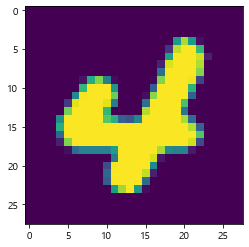

In [16]:
plt.imshow(mnist.test.images[r:r+1].reshape(28,28))

In [17]:
print("예측:",sess.run(tf.argmax(hypot,1),feed_dict={X:mnist.test.image[r:r+1]}))

AttributeError: 'DataSet' object has no attribute 'image'